# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [3]:
df = pd.read_csv('data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


In [4]:
df.shape

(1460, 26)

## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

In [5]:
num_df = df.select_dtypes(['int64', 'float64'])
num_df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [6]:
num_df.corr()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


In [7]:
num_del_list = [col for col in num_df.columns if '_M' in col]
df.drop(columns=num_del_list, inplace=True)

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

In [8]:
num_df.columns

Index(['LotArea', 'LotArea_M', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', 'TotalBsmtSF_M', 'GrLivArea',
       'GrLivArea_M', 'Bath', 'GarageArea', 'GarageArea_M', 'SalePrice'],
      dtype='object')

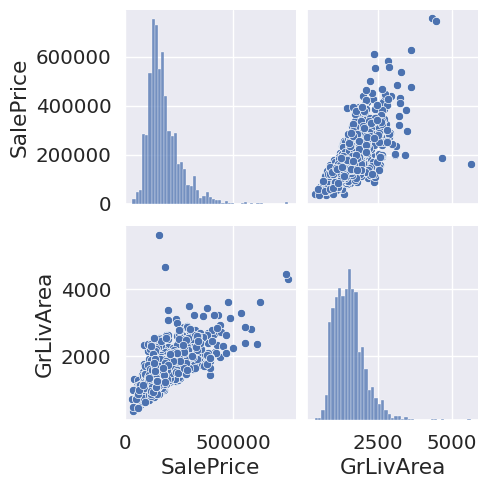

In [9]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
sns.pairplot(num_df[['SalePrice', 'GrLivArea']])

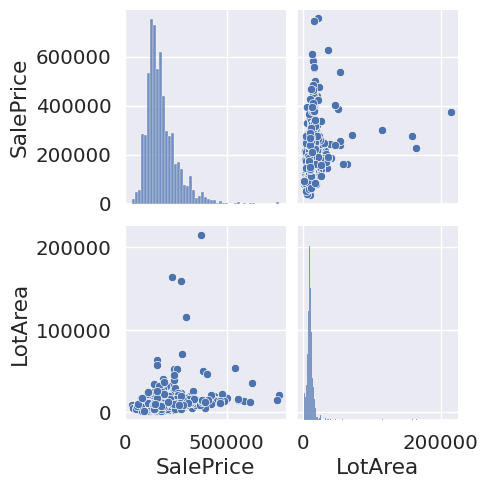

In [10]:
sns.pairplot(num_df[['SalePrice', 'LotArea']])

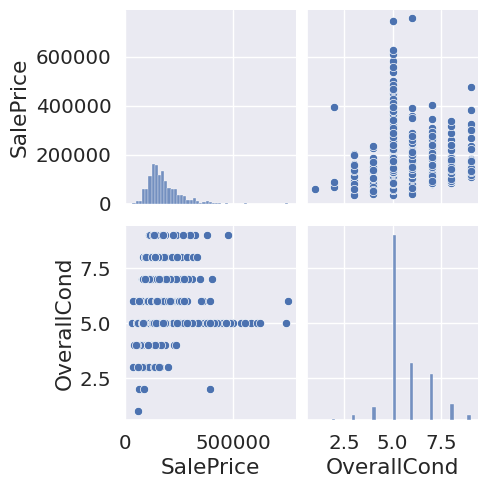

In [11]:
sns.pairplot(num_df[['SalePrice', 'OverallCond']])

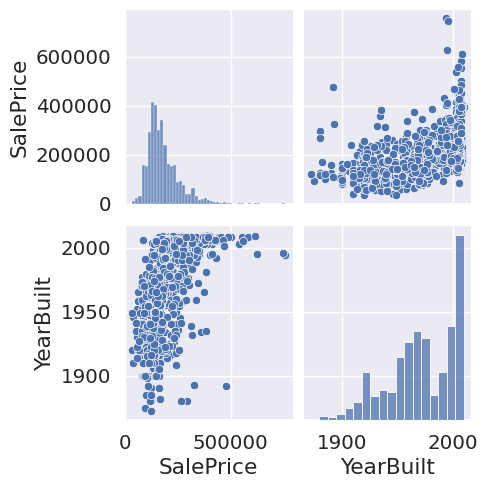

In [12]:
sns.pairplot(num_df[['SalePrice', 'YearBuilt']])

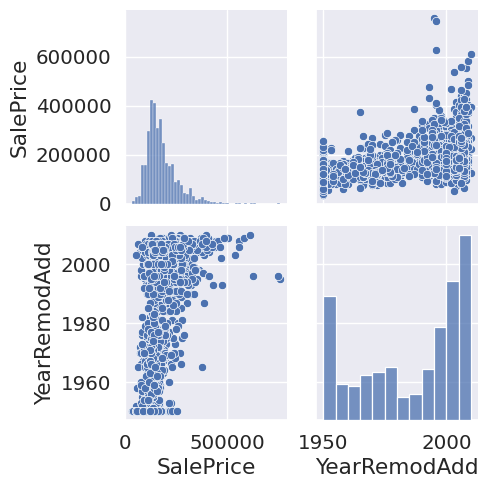

In [13]:
sns.pairplot(num_df[['SalePrice', 'YearRemodAdd']])

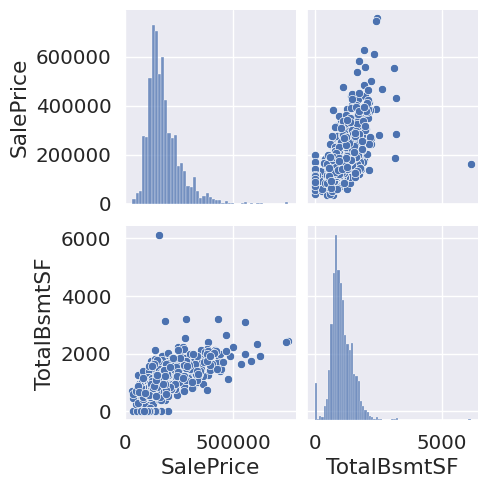

In [14]:
sns.pairplot(num_df[['SalePrice', 'TotalBsmtSF']])

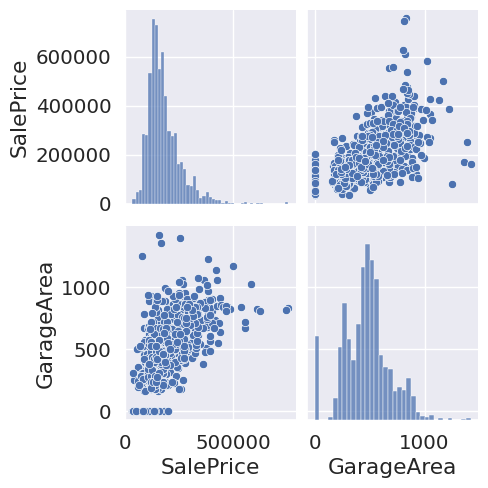

In [15]:
sns.pairplot(num_df[['SalePrice', 'GarageArea']])

4. Сделайте предварительные выводы.

Между числовыми переменными и целевой перменной есть линейная зависимость

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [9]:
new_df = df.copy()
# выделил отдельно месяц и год продажи, мне кажется эти признаки будут более информативные
new_df['MonthSold'] = new_df['DateSold'].apply(lambda x: int(x.split('/')[0]))
new_df['YearSold'] = new_df['DateSold'].apply(lambda x: int(x.split('/')[1]))

# Здесть сделал новую переменную возраст недвижимости, как мне показалось он несет больше информации
new_df['AgeBuilt'] = new_df['YearSold'] - new_df['YearBuilt']

new_df['GrLivArea/GrLivArea_mean'] = new_df['GrLivArea'].apply(lambda x: x / new_df['GrLivArea'].mean())
new_df['GrLivArea/OverallQual'] = new_df['GrLivArea'] / new_df['OverallQual']
new_df['GarageArea/GarageArea_mean'] = new_df['GarageArea'].apply(lambda x: x / new_df['GarageArea'].mean())
new_df['GarageArea/OverallQual'] = new_df['GarageArea'] / new_df['OverallQual']
new_df

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,DateSold,SaleCondition,SalePrice,MonthSold,YearSold,AgeBuilt,GrLivArea/GrLivArea_mean,GrLivArea/OverallQual,GarageArea/GarageArea_mean,GarageArea/OverallQual
0,8450,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,2/2008,Normal,208500,2,2008,5,1.128368,244.285714,1.158611,78.285714
1,9600,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,5/2007,Normal,181500,5,2007,31,0.832748,210.333333,0.972557,76.666667
2,11250,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,9/2008,Normal,223500,9,2008,7,1.178517,255.142857,1.285466,86.857143
3,9550,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,2/2006,Abnorml,140000,2,2006,91,1.132987,245.285714,1.357351,91.714286
4,14260,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,12/2008,Normal,250000,12,2008,8,1.450381,274.750000,1.767516,104.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,8/2007,Normal,175000,8,2007,8,1.086796,274.500000,0.972557,76.666667
1456,13175,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,2/2010,Normal,210000,2,2010,32,1.367898,345.500000,1.057127,83.333333
1457,9042,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,5/2010,Normal,266500,5,2010,69,1.544082,334.285714,0.532792,36.000000
1458,9717,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,4/2010,Normal,142125,4,2010,60,0.711333,215.600000,0.507421,48.000000


## Задание 4 

Подготовьте данные:
1. Закодируйте категориальные признаки в тренировочной и тестовой выборках.
2. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.
3. Разделите данные на тренировочную и тестовую выборки.

In [ ]:
from itertools import combinations

x = new_df.drop(['SalePrice', 'DateSold', 'YearBuilt'], axis=1)
y = new_df['SalePrice']

cat_columns = list(x.select_dtypes(['object']).columns)
cat_columns.extend(['OverallQual', 'OverallCond'])
num_columns = list(x.select_dtypes(['int64', 'float64']).columns)

for i in combinations(cat_columns, r=2):
    print(list(i))


In [50]:
x = new_df.drop(['SalePrice', 'DateSold', 'YearBuilt'], axis=1)
y = new_df['SalePrice']

cat_columns = list(x.select_dtypes(['object']).columns)
cat_columns.extend(['OverallQual', 'OverallCond'])
x = pd.get_dummies(data=x, columns=cat_columns)

num_columns = list(x.select_dtypes(['int64', 'float64']).columns)

columns_std = [f'{col}_std' for col in num_columns]

data_num_train = x[num_columns]
std_scaler_train = normalize(data_num_train)
x[columns_std] = std_scaler_train
x.drop(columns=num_columns, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [51]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [52]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [53]:
coef = list(zip(lr.feature_names_in_, lr.coef_))
coef

[('Street_Grvl', -524387588065937.44),
 ('Street_Pave', -524387588085719.1),
 ('BldgType_1Fam', 2.3514149619630406e+17),
 ('BldgType_2fmCon', 2.3514149619628666e+17),
 ('BldgType_Duplex', 2.3514149619628384e+17),
 ('BldgType_Twnhs', 2.3514149619626947e+17),
 ('BldgType_TwnhsE', 2.351414961962886e+17),
 ('RoofStyle_Flat', 6.966032260289167e+17),
 ('RoofStyle_Gable', 6.966032260289143e+17),
 ('RoofStyle_Gambrel', 6.966032260289142e+17),
 ('RoofStyle_Hip', 6.966032260289192e+17),
 ('RoofStyle_Mansard', 6.966032260289146e+17),
 ('RoofStyle_Shed', 6.966032260289344e+17),
 ('ExterQual_Ex', -1.3297208679396902e+17),
 ('ExterQual_Fa', -1.3297208679398018e+17),
 ('ExterQual_Gd', -1.3297208679397432e+17),
 ('ExterQual_TA', -1.3297208679397944e+17),
 ('ExterCond_Ex', 2.8948673336131616e+17),
 ('ExterCond_Fa', 2.89486733361333e+17),
 ('ExterCond_Gd', 2.8948673336132986e+17),
 ('ExterCond_Po', 2.8948673336134035e+17),
 ('ExterCond_TA', 2.894867333613322e+17),
 ('Foundation_BrkTil', -1.4728592860052

In [56]:
print(f'MAE train = {mean_absolute_error(y_train, pred_train)}')
print(f'MAE test = {mean_absolute_error(y_test, pred_test)}')

MAE train = 20753.365949119372
MAE test = 22317.086757990866


In [55]:
print(f'MSE train = {mean_squared_error(y_train, pred_train)}')
print(f'MSE test = {mean_squared_error(y_test, pred_test)}')

MSE train = 1101812327.8825831
MSE test = 1224510572.2054794


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [57]:
for i in range(-5, 5):
    alpha = 10**i
    lasso_regression = Lasso(random_state=42, alpha=alpha)

    lasso_regression.fit(x_train, y_train)

    print('-' * 10, 'lambda =', alpha, '-' * 10)
    pred_train_l = lasso_regression.predict(x_train)
    pred_test_l = lasso_regression.predict(x_test)
    print(f'MAE train = {mean_absolute_error(y_train, pred_train_l)}')
    print(f'MAE test = {mean_absolute_error(y_test, pred_test_l)}')
    print(f'MSE train = {mean_squared_error(y_train, pred_train_l)}')
    print(f'MSE test = {mean_squared_error(y_test, pred_test_l)}')
    print(f'R2 train = {r2_score(y_train, pred_train_l)}')
    print(f'R2 test = {r2_score(y_test, pred_test_l)}')

/home/igor/machine_learning_ds/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.627e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
/home/igor/machine_learning_ds/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.624e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


---------- lambda = 1e-05 ----------
MAE train = 20707.76776539172
MAE test = 22238.83023718871
MSE train = 1101201248.9085648
MSE test = 1220989966.734103
R2 train = 0.8170329084050355
R2 test = 0.8250252850472235
---------- lambda = 0.0001 ----------
MAE train = 20707.308286211985
MAE test = 22236.215138839216
MSE train = 1101198599.5539799
MSE test = 1220799156.982734
R2 train = 0.8170333486013244
R2 test = 0.8250526291555009


/home/igor/machine_learning_ds/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.606e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
/home/igor/machine_learning_ds/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.423e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


---------- lambda = 0.001 ----------
MAE train = 20707.83721810502
MAE test = 22240.408768505014
MSE train = 1101221390.8590755
MSE test = 1221279282.55207
R2 train = 0.8170295617741562
R2 test = 0.8249838244667443
---------- lambda = 0.01 ----------
MAE train = 20713.44398535296
MAE test = 22237.9962724866
MSE train = 1101257148.457876
MSE test = 1220994669.980427
R2 train = 0.8170236205678041
R2 test = 0.8250246110456286


/home/igor/machine_learning_ds/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.995e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
/home/igor/machine_learning_ds/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.828e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


---------- lambda = 0.1 ----------
MAE train = 20718.65757516784
MAE test = 22229.50010922367
MSE train = 1101337626.140659
MSE test = 1220742573.8489292
R2 train = 0.8170102490178065
R2 test = 0.825060737836144
---------- lambda = 1 ----------
MAE train = 20766.034294604262
MAE test = 22230.998394569328
MSE train = 1102579792.6866367
MSE test = 1223705803.856567
R2 train = 0.8168038602215539
R2 test = 0.8246360903451309
---------- lambda = 10 ----------
MAE train = 21135.796076403047
MAE test = 22399.385651039807
MSE train = 1119111030.9719965
MSE test = 1232403136.0821695
R2 train = 0.8140571573890486
R2 test = 0.8233897138240404
---------- lambda = 100 ----------
MAE train = 22238.50160390489
MAE test = 23328.061149037007
MSE train = 1215441948.4846718
MSE test = 1302309654.8902037
R2 train = 0.7980515563915581
R2 test = 0.8133717173334595
---------- lambda = 1000 ----------
MAE train = 28534.366139440215
MAE test = 29063.33151087852
MSE train = 1853523488.319828
MSE test = 20447250

/home/igor/machine_learning_ds/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.692e+09, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


In [58]:
lasso = Lasso(random_state=42, alpha=0.1)
lasso.fit(x_train, y_train)

/home/igor/machine_learning_ds/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.995e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, random_state=42)

In [59]:
pred_train_l = lasso.predict(x_train)
pred_test_l = lasso.predict(x_test)

In [60]:
print(f'MAE train = {mean_absolute_error(y_train, pred_train_l)}')
print(f'MAE train = {mean_absolute_error(y_test, pred_test_l)}')

MAE train = 20718.65757516784
MAE train = 22229.50010922367


In [61]:
print(f'MSE train = {mean_squared_error(y_train, pred_train_l)}')
print(f'MSE train = {mean_squared_error(y_test, pred_test_l)}')

MSE train = 1101337626.140659
MSE train = 1220742573.8489292


In [62]:
coef = list(zip(lasso.feature_names_in_, lasso.coef_))
coef.sort(key=lambda x: x[1], reverse=True)
coef

[('GarageArea/OverallQual_std', 730558.5861955419),
 ('GrLivArea_std', 266736.6295434534),
 ('GrLivArea/OverallQual_std', 217967.46364351743),
 ('OverallQual_10', 135702.73658086854),
 ('TotalBsmtSF_std', 132006.99881644204),
 ('OverallQual_9', 87331.00066124852),
 ('SaleCondition_Alloca', 36505.244196734835),
 ('OverallQual_8', 29102.661750349336),
 ('KitchenQual_Ex', 23078.691561884498),
 ('HeatingQC_Po', 20124.26401671207),
 ('BldgType_1Fam', 19434.360535100644),
 ('Heating_Wall', 18622.253475941117),
 ('RoofStyle_Shed', 18094.41198305706),
 ('Street_Grvl', 17504.715525758187),
 ('OverallCond_9', 15695.773530790022),
 ('OverallQual_1', 13591.408433298477),
 ('ExterQual_Ex', 10399.872564992556),
 ('SaleCondition_AdjLand', 8454.87677621005),
 ('OverallCond_8', 8283.685903440874),
 ('KitchenQual_Gd', 8131.367107611574),
 ('Heating_GasW', 7315.855333726347),
 ('ExterCond_Po', 7090.2219535119475),
 ('SaleCondition_Partial', 6939.141448772764),
 ('ExterQual_Gd', 4661.043330096074),
 ('Bld

In [63]:
cf_0 = [f_coef for f_coef in zip(lasso.feature_names_in_, lasso.coef_) if f_coef[1] == 0]
cf_0

[('Street_Pave', -0.0),
 ('ExterCond_TA', 0.0),
 ('Heating_Grav', 0.0),
 ('Bath_std', 0.0),
 ('MonthSold_std', -0.0),
 ('GrLivArea/GrLivArea_mean_std', -0.0),
 ('GarageArea/GarageArea_mean_std', -0.0)]

Посмотрите на веса полученной модели. Какой вывод можно сделать?

Веса в полученой модели, по сравнению с LinearRegression, по модулю меньше. Появились нулевые веса. Взять например Bath_std, скорей всего этот признак должен оказывать какое-то влияние. Самые большие веса у тех признаков которые и должны больше всего влиять на стоимость дома

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [64]:
for i in range(-5, 2):
    alpha = 10**i
    ridge_regression = Ridge(random_state=42, alpha=alpha)

    ridge_regression.fit(x_train, y_train)

    print('-' * 10, 'lambda =', alpha, '-' * 10)
    pred_train_r = ridge_regression.predict(x_train)
    pred_test_r = ridge_regression.predict(x_test)
    print(f'MAE train = {mean_absolute_error(y_train, pred_train_r)}')
    print(f'MAE test = {mean_absolute_error(y_test, pred_test_r)}')
    print(f'MSE train = {mean_squared_error(y_train, pred_train_r)}')
    print(f'MSE test = {mean_squared_error(y_test, pred_test_r)}')
    print(f'R2 train = {r2_score(y_train, pred_train_r)}')
    print(f'R2 test = {r2_score(y_test, pred_test_r)}')

---------- lambda = 1e-05 ----------
MAE train = 20731.57067197589
MAE test = 22244.248221151163
MSE train = 1101138948.0028408
MSE test = 1219851338.62124
R2 train = 0.8170432598421914
R2 test = 0.8251884568462665
---------- lambda = 0.0001 ----------
MAE train = 20732.47669183751
MAE test = 22229.452287619362
MSE train = 1101209359.9264119
MSE test = 1219757114.6951241
R2 train = 0.8170315607409762
R2 test = 0.825201959663704
---------- lambda = 0.001 ----------
MAE train = 20765.59080377741
MAE test = 22201.388071952762
MSE train = 1102842651.0629528
MSE test = 1222187738.987952
R2 train = 0.8167601857045993
R2 test = 0.824853637560835
---------- lambda = 0.01 ----------
MAE train = 20954.136206185238
MAE test = 22344.944196792872
MSE train = 1111031891.5642219
MSE test = 1232020386.5029724
R2 train = 0.815399524773299
R2 test = 0.8234445639868941
---------- lambda = 0.1 ----------
MAE train = 21069.08523781623
MAE test = 22338.099698680577
MSE train = 1122277204.2551913
MSE test = 

MAE train = 22316.71304465915
MAE test = 23552.740667573293
MSE train = 1228852763.0566924
MSE test = 1347731746.0493517
R2 train = 0.7958233190547462
R2 test = 0.8068624767420814
---------- lambda = 10 ----------
MAE train = 26195.769168555427
MAE test = 27009.155045595402
MSE train = 1575117749.4241393
MSE test = 1712956739.8635519
R2 train = 0.7382906041766847
R2 test = 0.7545236853290755


In [65]:
ridge = Ridge(random_state=42, alpha=0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01, random_state=42)

In [66]:
pred_train_r = ridge.predict(x_train)
pred_test_r = ridge.predict(x_test)

In [67]:
print(f'MAE train = {mean_absolute_error(y_train, pred_train_r)}')
print(f'MAE test = {mean_absolute_error(y_test, pred_test_r)}')
print(f'MSE train = {mean_squared_error(y_train, pred_train_r)}')
print(f'MSE train = {mean_squared_error(y_test, pred_test_r)}')
print(f'R2 train = {r2_score(y_train, pred_train_r)}')
print(f'R2 train = {r2_score(y_test, pred_test_r)}')

MAE train = 20954.136206185238
MAE test = 22344.944196792872
MSE train = 1111031891.5642219
MSE train = 1232020386.5029724
R2 train = 0.815399524773299
R2 train = 0.8234445639868941


In [68]:
coef = list(zip(ridge.feature_names_in_, ridge.coef_))
coef.sort(key=lambda x: x[1], reverse=True)
coef

[('GrLivArea_std', 276549.0029044985),
 ('TotalBsmtSF_std', 136558.22156349703),
 ('GarageArea_std', 134535.4853803109),
 ('OverallQual_10', 129576.07705056808),
 ('OverallQual_9', 82177.1385705034),
 ('GarageArea/OverallQual_std', 48412.69659204721),
 ('GrLivArea/OverallQual_std', 42264.450903715224),
 ('SaleCondition_Alloca', 36212.113675985),
 ('OverallCond_9', 31234.703345106875),
 ('OverallCond_8', 25218.593778245508),
 ('Heating_Wall', 25103.29388756117),
 ('OverallQual_8', 24640.48866263251),
 ('OverallCond_7', 21620.770480736206),
 ('OverallQual_1', 21350.841146328614),
 ('KitchenQual_Ex', 17224.75004190149),
 ('RoofStyle_Shed', 16714.44368763796),
 ('OverallCond_6', 15346.900091384574),
 ('BldgType_1Fam', 14671.121812317708),
 ('HeatingQC_Po', 14653.198121420957),
 ('Heating_GasW', 13893.990710205762),
 ('Foundation_PConc', 12118.110993828252),
 ('OverallCond_5', 11916.136505825494),
 ('Heating_Floor', 9054.482977650348),
 ('Street_Grvl', 9006.294716583103),
 ('Heating_Grav', 

Посмотрите на веса полученной модели. Какой вывод можно сделать?

В этой модели самое равномерное распределение весов признаков, нет таких больших как в LinearRegression и нет нулевых как в Lasso. У OverallQual странные веса, много отрицательных и OverallQual_8 и OverallQual_1 оба с положительными весами, хотя они явно должны отличаться 

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 